In [1]:
!pip install pandas
import pandas as pd
!pip install numpy
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
!pip install matplotlib
import matplotlib.pyplot as plt
import nibabel as nib
import keras
from keras.layers import Input
from tensorflow.keras.applications import ResNet50
!pip install scikit-image
import skimage.transform as skTrans

Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(CertificateError("hostname 'pypi.org' doesn't match either of 'internet.ut.ac.ir', 'utnet.ut.ac.ir', 'internet1.ut.ac.ir', 'hsinform.ut.ac.ir'"))) - skipping
Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(CertificateError("hostname 'pypi.org' doesn't match either of 'internet.ut.ac.ir', 'utnet.ut.ac.ir', 'internet1.ut.ac.ir', 'hsinform.ut.ac.ir'"))) - skipping
Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL ht

2023-07-13 15:47:08.472498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-13 15:47:08.913520: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-07-13 15:47:08.913563: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-07-13 15:47:08.913568: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(CertificateError("hostname 'pypi.org' doesn't match either of 'internet.ut.ac.ir', 'utnet.ut.ac.ir', 'internet1.ut.ac.ir', 'hsinform.ut.ac.ir'"))) - skipping


In [2]:
#reading datas

total_data = pd.read_csv("./total_data_finally.csv")

In [3]:
total_data

,Unnamed: 0,Subject ID,Research Group
0,0,002_S_0295,CN
1,1,002_S_0413,CN
2,2,002_S_0559,CN
3,3,002_S_0619,AD
4,4,002_S_0685,CN
...,...,...,...
285,285,131_S_0691,AD
286,286,131_S_1389,MCI
287,287,133_S_0525,CN
288,288,136_S_0429,MCI


In [5]:
#function for finding the paths of image data

def path_data(category,patient,region):
    paths = []
    for i in range(0,len(patient)):
        path = "./"+patient[i]+"/"+region+".nii.gz"
        paths.append(path)
    return paths

In [6]:
#function for reading MRIs with Niftii format with Nibabel

def read_nifti_file(filepath):
    scan = nib.load(filepath).get_fdata()
    return scan

In [23]:
#image to png Coronal
import matplotlib.image
AD = total_data[total_data["Research Group"]=="AD"]

for i in AD["Subject ID"]:
    image = None
    del image
    im = None
    del im
    gm = nib.load("./data/AD/"+i+"/GM.nii.gz").get_fdata()[:,:,128]
    x,y = gm.shape
    gm = gm.reshape(x,y,1)
    gm = gm/3
    image = np.concatenate((gm,gm,gm),axis=2)
#     image = image.astype(np.uint8)
#     im = Image.fromarray(image)
#     im = im.astype(np.uint8)
    matplotlib.image.imsave("./data/images_gray/GM/AD/coronal/"+i+".png", image)

#     cv2.imwrite("./data/images/MCI/"+i+".jpeg", image)

In [24]:
#image to png Coronal MCI
import matplotlib.image
MCI = total_data[total_data["Research Group"]=="MCI"]

for i in MCI["Subject ID"]:
    image = None
    del image
    im = None
    del im
    gm = nib.load("./data/MCI/"+i+"/GM.nii.gz").get_fdata()[:,:,128]
    x,y = gm.shape
    gm = gm.reshape(x,y,1)
    gm = gm/3
    image = np.concatenate((gm,gm,gm),axis=2)
#     image = image.astype(np.uint8)
#     im = Image.fromarray(image)
#     im = im.astype(np.uint8)
    matplotlib.image.imsave("./data/images_gray/GM/MCI/coronal/"+i+".png", image)

#     cv2.imwrite("./data/images/MCI/"+i+".jpeg", image)

In [25]:
#image to png Coronal CN
import matplotlib.image
CN = total_data[total_data["Research Group"]=="CN"]

for i in CN["Subject ID"]:
    image = None
    del image
    im = None
    del im
    gm = nib.load("./data/CN/"+i+"/GM.nii.gz").get_fdata()[:,:,128]
    x,y = gm.shape
    gm = gm.reshape(x,y,1)
    gm = gm/3
    image = np.concatenate((gm,gm,gm),axis=2)
#     image = image.astype(np.uint8)
#     im = Image.fromarray(image)
#     im = im.astype(np.uint8)
    matplotlib.image.imsave("./data/images_gray/GM/CN/coronal/"+i+".png", image)

#     cv2.imwrite("./data/images/MCI/"+i+".jpeg", image)

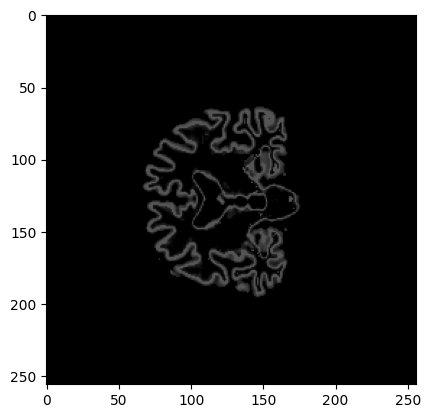

In [26]:
# 002_S_0619.png
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = Image.open("./data/images_gray/GM/CN/coronal/002_S_0295.png")
imgplot = plt.imshow(img)

In [7]:
#image to png Sagital
import matplotlib.image
AD = total_data[total_data["Research Group"]=="AD"]

for i in AD["Subject ID"]:
    image = None
    del image
    im = None
    del im
    gm = nib.load("./data/AD/"+i+"/GM.nii.gz").get_fdata()[128,:,:]
    x,y = gm.shape
    gm = gm.reshape(x,y,1)
    gm = gm/3
    image = np.concatenate((gm,gm,gm),axis=2)
#     image = image.astype(np.uint8)
#     im = Image.fromarray(image)
#     im = im.astype(np.uint8)
    matplotlib.image.imsave("./data/images_gray/GM/AD/sagital/"+i+".png", image)

#     cv2.imwrite("./data/images/MCI/"+i+".jpeg", image)

In [9]:
#image to png Sagital MCI
import matplotlib.image
MCI = total_data[total_data["Research Group"]=="MCI"]

for i in MCI["Subject ID"]:
    image = None
    del image
    im = None
    del im
    gm = nib.load("./data/MCI/"+i+"/GM.nii.gz").get_fdata()[128,:,:]
    x,y = gm.shape
    gm = gm.reshape(x,y,1)
    gm = gm/3
    image = np.concatenate((gm,gm,gm),axis=2)
#     image = image.astype(np.uint8)
#     im = Image.fromarray(image)
#     im = im.astype(np.uint8)
    matplotlib.image.imsave("./data/images_gray/GM/MCI/sagital/"+i+".png", image)

#     cv2.imwrite("./data/images/MCI/"+i+".jpeg", image)

In [10]:
#image to png Sagital CN
import matplotlib.image
CN = total_data[total_data["Research Group"]=="CN"]

for i in CN["Subject ID"]:
    image = None
    del image
    im = None
    del im
    gm = nib.load("./data/CN/"+i+"/GM.nii.gz").get_fdata()[128,:,:]
    x,y = gm.shape
    gm = gm.reshape(x,y,1)
    gm = gm/3
    image = np.concatenate((gm,gm,gm),axis=2)
#     image = image.astype(np.uint8)
#     im = Image.fromarray(image)
#     im = im.astype(np.uint8)
    matplotlib.image.imsave("./data/images_gray/GM/CN/sagital/"+i+".png", image)

#     cv2.imwrite("./data/images/MCI/"+i+".jpeg", image)

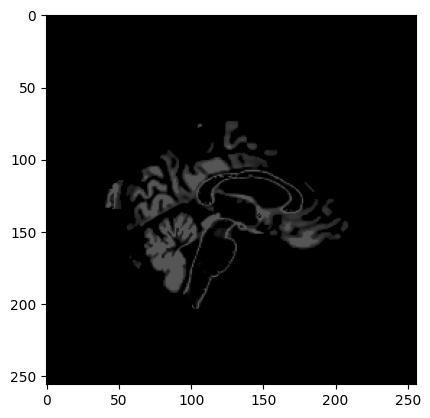

In [13]:
# 002_S_0729.png
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = Image.open("./data/images_gray/GM/MCI/sagital/002_S_1070.png").convert("RGB")
imgplot = plt.imshow(img)

In [21]:
#image to png Axial
import matplotlib.image
AD = total_data[total_data["Research Group"]=="AD"]

for i in AD["Subject ID"]:
    image = None
    del image
    im = None
    del im
    gm = nib.load("./data/AD/"+i+"/GM.nii.gz").get_fdata()[:,128,:]
    x,y = gm.shape
    gm = gm.reshape(x,y,1)
    gm = gm/3
    image = np.concatenate((gm,gm,gm),axis=2)
#     image = image.astype(np.uint8)
#     im = Image.fromarray(image)
#     im = im.astype(np.uint8)
    matplotlib.image.imsave("./data/images_gray/GM/AD/axial/"+i+".png", image)

#     cv2.imwrite("./data/images/MCI/"+i+".jpeg", image)

In [19]:
#image to png Axial MCI
import matplotlib.image
MCI = total_data[total_data["Research Group"]=="MCI"]

for i in MCI["Subject ID"]:
    image = None
    del image
    im = None
    del im
    gm = nib.load("./data/MCI/"+i+"/GM.nii.gz").get_fdata()[:,128,:]
    x,y = gm.shape
    gm = gm.reshape(x,y,1)
    gm = gm/3
    image = np.concatenate((gm,gm,gm),axis=2)
#     image = image.astype(np.uint8)
#     im = Image.fromarray(image)
#     im = im.astype(np.uint8)
    matplotlib.image.imsave("./data/images_gray/GM/MCI/axial/"+i+".png", image)

#     cv2.imwrite("./data/images/MCI/"+i+".jpeg", image)

In [20]:
#image to png Axial CN
import matplotlib.image
CN = total_data[total_data["Research Group"]=="CN"]

for i in CN["Subject ID"]:
    image = None
    del image
    im = None
    del im
    gm = nib.load("./data/CN/"+i+"/GM.nii.gz").get_fdata()[:,128,:]
    x,y = gm.shape
    gm = gm.reshape(x,y,1)
    gm = gm/3
    image = np.concatenate((gm,gm,gm),axis=2)
#     image = image.astype(np.uint8)
#     im = Image.fromarray(image)
#     im = im.astype(np.uint8)
    matplotlib.image.imsave("./data/images_gray/GM/CN/axial/"+i+".png", image)

#     cv2.imwrite("./data/images/MCI/"+i+".jpeg", image)

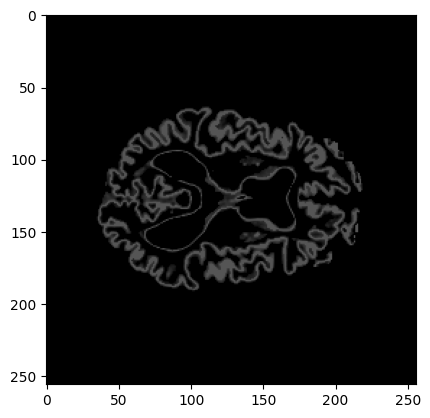

In [22]:
# 002_S_0782.png
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = Image.open("./data/images_gray/GM/MCI/axial/002_S_0782.png").convert("RGB")
imgplot = plt.imshow(img)